In [1]:
# We first verify the correct version of TF installed
# !pip install -q tensorflow-gpu==2.1.0

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

TensorFlow 2.x selected.
2.1.0


In [2]:
# Then, we load the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
# Then, we normalize the input data, by scaling them to be between [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

(60000, 28, 28)


In [0]:
# This is where we build the model
# The first layer flattens the data from Nx28x28 to Nx784
# Then we have a dense layer of size 128 with a Relu activation
# We add Dropout regularization with a dropout percentage of 20%

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Next, we compile the model, with default settings
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# We print out a summery of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


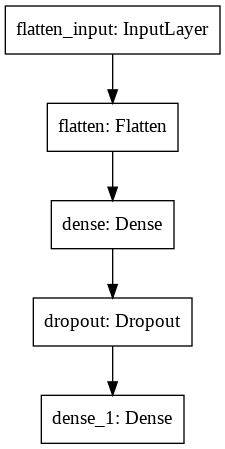

In [39]:
tf.keras.utils.plot_model(model, to_file = './drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models/MNIST.png')

In [0]:
# We create a ModelCheckpoint function for keeping track of the accuracy
import os
!pip install -q pyyaml h5py

if not os.path.exists('./drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models'):
  os.mkdir('./drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models')

checkpoint_path = "./drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models/MNIST.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

ModelCheckpoint = [tf.keras.callbacks.ModelCheckpoint(
    # filepath = 'content/drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models/MNIST.cpkt',
    filepath = checkpoint_path,
    monitor='val_loss',
    mode = 'min',
    save_best_only = True,
)]

In [7]:
results = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs = 10,
    callbacks = ModelCheckpoint,
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2951 - accuracy: 0.9140 - val_loss: 0.1400 - val_accuracy: 0.9596
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1411 - accuracy: 0.9584 - val_loss: 0.1036 - val_accuracy: 0.9680
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1067 - accuracy: 0.9678 - val_loss: 0.0821 - val_accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0869 - accuracy: 0.9729 - val_loss: 0.0755 - val_accuracy: 0.9756
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0760 - accuracy: 0.9763 - val_loss: 0.0777 - val_accuracy: 0.9759
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0631 - accuracy: 0.9795 - val_loss: 0.0746 - val_accuracy: 0.9782
Epoch 7/10
60000/60000 [==============================

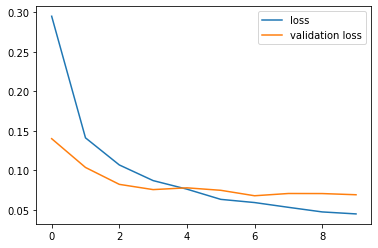

In [8]:
# Plot the loss per iteration
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='validation loss')
plt.legend()

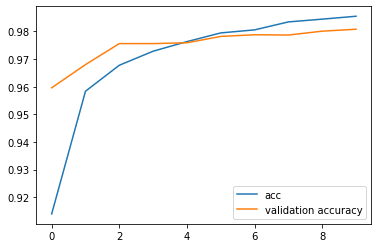

In [11]:
# Plot the accuracy per iteration
plt.plot(results.history['accuracy'], label='acc')
plt.plot(results.history['val_accuracy'], label='validation accuracy')
plt.legend()

In [12]:
# Evaluate the model
print(model.evaluate(X_test, y_test))

10000/10000 [==============================] - 0s 46us/sample - loss: 0.0690 - accuracy: 0.9808
[0.06896053107618645, 0.9808]


Confusion matrix withouth normalization!
[[ 968    1    1    2    1    0    3    1    3    0]
 [   0 1122    4    1    0    1    2    1    4    0]
 [   2    1 1013    5    4    0    2    4    1    0]
 [   0    0    1  999    0    0    0    4    2    4]
 [   0    0    3    0  961    0    4    3    0   11]
 [   2    1    0   18    1  858    2    2    6    2]
 [   3    3    0    0    1    5  943    0    3    0]
 [   1    4   10    1    0    0    0 1007    1    4]
 [   1    1    4    6    3    3    1    3  949    3]
 [   1    2    0    5    6    2    0    4    1  988]]


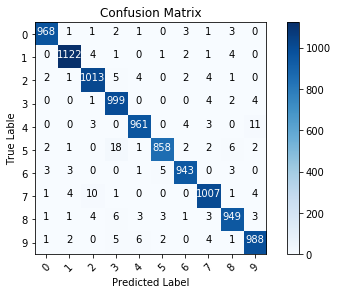

In [24]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """ This function prints and plots the confusion matrix. Normalization can be applied
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix!')
    else:
        print('Confusion matrix withouth normalization!')

    print (cm)

    plt.imshow(cm, interpolation= 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i,j]>threshold else "black")
    
    plt.tight_layout()
    plt.ylabel("True Lable")
    plt.xlabel("Predicted Label")
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


Text(0.5, 1.0, 'True label: 2 || Predicted: 1')

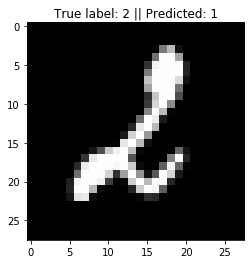

In [37]:
# We show some of the misclassified examples
misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(X_test[i],cmap='gray')
plt.title("True label: %s || Predicted: %s" %(y_test[i], p_test[i]))